In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import pickle, os

In [98]:
dataset_name = "W14_comb"
df_list = [
           "BES_Panel",
           "BES_reduced_with_na",
#            "BESnumeric"
#            "BES_reduced",
#            "BESnumeric"
          ]

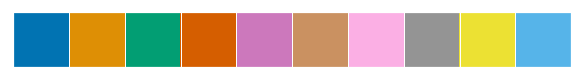

In [99]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re
sns.set()
sns.palplot(sns.color_palette("colorblind"))
from IPython.display import display, display_html, HTML

import Jupyter_module_loader
from utility import *
import gaussian_kde


In [100]:
# you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
%matplotlib inline
encoding = "ISO-8859-1"

(BES_code_folder, BES_small_data_files, BES_data_folder,
 BES_output_folder, BES_file_manifest, BES_R_data_files) = setup_directories()



In [101]:
global BES_Panel, BES_numeric, BES_reduced, BES_reduced_with_na, BES_non_numeric
data_subfolder = BES_data_folder + dataset_name + os.sep

(manifest, dataset_filename, dataset_description, dataset_citation,
 dataset_start, dataset_stop, dataset_wave) = get_manifest(dataset_name, BES_file_manifest)

for df in df_list:
    if df=="BES_Panel":
        globals()[df]  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))
    else:
        globals()[df]  = pd.read_msgpack(data_subfolder + df + '.msgpack' )
        globals()[df].replace(-1,np.nan,inplace=True)
  
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

var_type (5692, 13)


In [102]:
# %%time
# BES_data_folder = "../BES_analysis_data/"
# BES_code_folder = "../BES_analysis_code/"
# BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W10_Panel_v0.3.dta")

In [103]:
import holoviews as hv
hv.notebook_extension()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [104]:
## Relevant BES variables for 2015 Campaign

# CampaignDayW5
# wt_daily_W5
# enddateW5 (formatted)

In [211]:
# underlying total distribution of Most Important Issue responses
BES_Panel["small_mii_catW5"].value_counts()

Economy               8794
Immigration           6274
Health                3752
Inequality            2812
Austerity/spending    1764
Negativity             986
Other                  979
Other lib-auth         650
Europe                 582
Terrorism              554
Environment            523
Other Left-right        79
Name: small_mii_catW5, dtype: int64

In [106]:
#
# sample size on each day (mean ~810)
BES_Panel["CampaignDayW5"].value_counts().sort_index()

1.0      796
2.0      974
3.0      987
4.0      910
5.0      885
6.0      762
7.0      777
8.0      792
9.0      890
10.0     667
11.0     745
12.0     672
13.0     638
14.0     760
15.0     830
16.0     785
17.0     717
18.0     771
19.0     635
20.0     634
21.0     805
22.0     827
23.0     787
24.0     440
25.0    1004
26.0     709
27.0     742
28.0     725
29.0     844
30.0     934
31.0     887
32.0     927
33.0     805
34.0     930
35.0     892
36.0    1016
37.0    1049
38.0     882
Name: CampaignDayW5, dtype: int64

In [228]:
# # actual crosstabs of campaign day vs MII
# crosstab = pd.crosstab(index   = BES_Panel[ 'CampaignDayW5' ],
#                        columns = BES_Panel[ "small_mii_catW5" ],
#                        values  = BES_Panel[ "wt_daily_W5" ],
#                        aggfunc = sum,
#                        normalize='index')

# crosstab.index = crosstab.index.astype('int')
# crosstab.index.name = "Campaign Day"
# crosstab.columns.name = "Most Important Issue"

# # crosstab

In [242]:
search(BES_Panel,"mii.*W8")

miiW8              33502
bestOnMIIW8        30430
miieuW8            33502
EUMIICategoryW8    16181
euMIISmallW8       16181
mii_catW8          30405
LRAL_mii_catW8     30271
small_mii_catW8    29280
dtype: int64

In [234]:
%%output size = 200

def get_campaign_curve(index_var,column_var,wt_var,x_axis,y_axis,dimension_name,title):

  

    crosstab = pd.crosstab(index   = BES_Panel[ index_var ],
                           columns = BES_Panel[ column_var ],
                           values  = BES_Panel[ wt_var ],
                           aggfunc = sum,
                           normalize='index')




    crosstab.index = crosstab.index.astype('int')
    crosstab.index.name = x_axis
    crosstab.columns.name = y_axis




    x_dim = hv.Dimension(x_axis, values = crosstab.index)
    y_dim = hv.Dimension(y_axis, unit = '%')

    curves = hv.HoloMap(kdims=[dimension_name])
    bars   = hv.HoloMap(kdims=[dimension_name])
    tables = hv.HoloMap(kdims=[dimension_name])

    ordered_columns = crosstab.sum().sort_values(ascending=False).index

    for mii in range(0 , len( crosstab.columns) ):

        df = crosstab[ ordered_columns[mii] ] * 100
        df.name = y_axis
        curves[mii] = hv.Curve(df ,
                               kdims = [x_dim] ,
                               vdims = [y_dim], group=ordered_columns[mii], label= title)

    #     tables[mii] = hv.Table( df, kdims=[x_dim], vdims =[y_dim], label=ordered_columns[mii] )
    #     bars[mii]   = hv.Bars( df , kdims=[x_dim], vdims =[y_dim], label=ordered_columns[mii] )     

    return curves

In [240]:
%%output size = 180
get_campaign_curve(index_var = 'CampaignDayW5',
    column_var = "small_mii_catW5",
    wt_var = "wt_daily_W5",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2015GE MII CATEGORY:")    

:HoloMap   [MII]
   :Curve   [Campaign Day]   (Most Important Issue)

In [241]:
%%output size = 180
get_campaign_curve(index_var = 'CampaignDayW5',
    column_var = "LRAL_mii_catW5",
    wt_var = "wt_daily_W5",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2015GE MII TYPE:")    

:HoloMap   [MII]
   :Curve   [Campaign Day]   (Most Important Issue)

In [244]:
%%output size = 180
get_campaign_curve(index_var = 'CampaignDayW8',
    column_var = "small_mii_catW8",
    wt_var = "wt_daily_W8",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2016EUREF MII CATEGORY:")    

:HoloMap   [MII]
   :Curve   [Campaign Day]   (Most Important Issue)

In [245]:
%%output size = 180
get_campaign_curve(index_var = 'CampaignDayW8',
    column_var = "LRAL_mii_catW8",
    wt_var = "wt_daily_W8",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2016EUREF MII TYPE:")    

:HoloMap   [MII]
   :Curve   [Campaign Day]   (Most Important Issue)

In [246]:
%%output size = 180
get_campaign_curve(index_var = 'CampaignDayW12',
    column_var = "small_mii_catW12",
    wt_var = "wt_daily_W12",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2017GE MII CATEGORY:")    

:HoloMap   [MII]
   :Curve   [Campaign Day]   (Most Important Issue)

In [247]:
%%output size = 180
get_campaign_curve(index_var = 'CampaignDayW12',
    column_var = "LRAL_mii_catW12",
    wt_var = "wt_daily_W12",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2017GE MII TYPE:")    

:HoloMap   [MII]
   :Curve   [Campaign Day]   (Most Important Issue)

In [ ]:
###############################################################################################################
### BEYOND HERE BE UGLINESS ###################################################################################
###############################################################################################################

In [248]:
# %%opts  Bars [category_index=2 stack_index=0 group_index=1 legend_position='top' legend_cols=7 color_by=['stack']  ]  (color=Palette('Dark2'))  

# macro.to.bars(['Like Natalie Bennett', '2015GE Campaign Day'], 'Frequency', [])

In [ ]:
## try same thing on EU referendum campaign

## PROBLEM -> data doesn't exist in Wave 10 (because they had to rush it out? Maybe it's in wave9?)

## Nope - not out yet!

In [ ]:
# key_dimensions   = [('year', 'Year'), ('country', 'Country')]



In [124]:
%%opts  Bars [category_index=2 stack_index=0 group_index=1 legend_position='top' legend_cols=7 color_by=['stack']  ]  (color=Palette('Dark2'))  

corr_vars = corr_df[corr_df["sample_size"]>2000].sort_values(by="absolute corr", ascending=False).head(21).index

bars     = hv.HoloMap(kdims=['corr_vars'])
tables   = hv.HoloMap(kdims=['corr_vars'])

b = pd.DataFrame(columns = ["Variable","CampaignDayW5","frequency","corr_var"])

for corr_var_no in range(0,len(corr_vars)):
    corr_var = corr_vars[corr_var_no]

    # actual crosstabs of campaign day vs MII
    crosstab = pd.crosstab(index   = BES_Panel[ 'CampaignDayW5' ],
                           columns = BES_Panel[ corr_var ],
                           values  = BES_Panel[ "wt_daily_W5" ],
                           aggfunc = sum,
                           normalize='index')

    a = pd.DataFrame(crosstab.unstack()).reset_index()
    a.columns = [corr_var,"CampaignDayW5","frequency"]
#     a["corr_var"] = corr_var
    
#     b=b.append(a, ignore_index = True)

    key_dimensions   = [('CampaignDayW5', '2015GE Campaign Day'), (corr_var, corr_var)]
    value_dimensions = [('frequency', 'Frequency')]
    tables[corr_var_no] = hv.Table(a, kdims=key_dimensions, vdims=value_dimensions)
#     bars[corr_var_no]   = tables[corr_var_no].to.bars([corr_var, '2015GE Campaign Day'], 'Frequency', [])
    bars[corr_var_no]   = tables[corr_var_no].to.bars(['CampaignDayW5', '2015GE Campaign Day'], 'Frequency', [], label=corr_var)
    print(corr_var)
                         
bars

postalTurnoutW5
discussPolDaysW5
winConstituencySNPW5
participation_5W5
likeBennettW5
infoSourcePeopleW5
fbInfo_1W5
majorityPartyLabW5
labPartnerSNPW5
fbInfo_3W5
lrgreensW5
fbInfo_2W5
partyContactConW5
lrPCW5
lrSNPW5
majorityPartyConW5
conPartnerSNPW5
noChanceCoalitionSNPW5
noChanceCoalitionLDW5
conToneW5
labPartnerUKIPW5


:HoloMap   [corr_vars]
   :Bars   [CampaignDayW5,CampaignDayW5]   (frequency)

:Table   [CampaignDayW5,labPartnerUKIPW5]   (frequency)
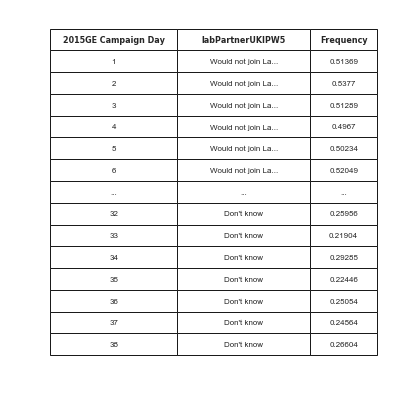

In [120]:
hv.Table(a, kdims=key_dimensions, vdims=value_dimensions)

In [122]:
a

,labPartnerUKIPW5,CampaignDayW5,frequency
0,Would not join Labour,1.0,0.513686
1,Would not join Labour,2.0,0.537703
2,Would not join Labour,3.0,0.512888
3,Would not join Labour,4.0,0.496703
4,Would not join Labour,5.0,0.502339
5,Would not join Labour,6.0,0.520493
6,Would not join Labour,7.0,0.518764
7,Would not join Labour,8.0,0.513467
8,Would not join Labour,9.0,0.509435
9,Would not join Labour,10.0,0.537903


:Bars   [labPartnerUKIPW5,CampaignDayW5]   (frequency)
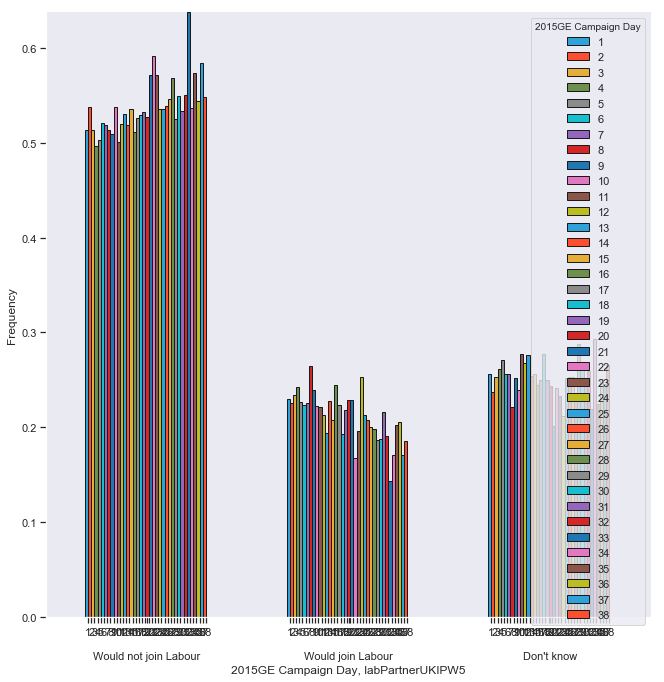

In [97]:
tables[corr_var_no].to.bars([corr_var, '2015GE Campaign Day'], 'Frequency', [])


:Bars   [labPartnerUKIPW5,CampaignDayW5]   (frequency)
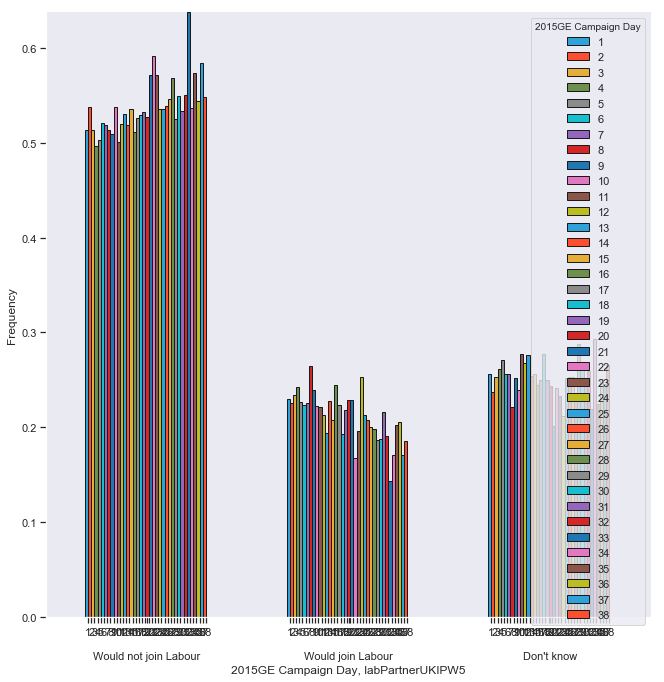

In [86]:
tables[corr_var_no].to.bars([corr_var, '2015GE Campaign Day'], 'Frequency', [])

:Bars   [labPartnerUKIPW5,CampaignDayW5]   (frequency)
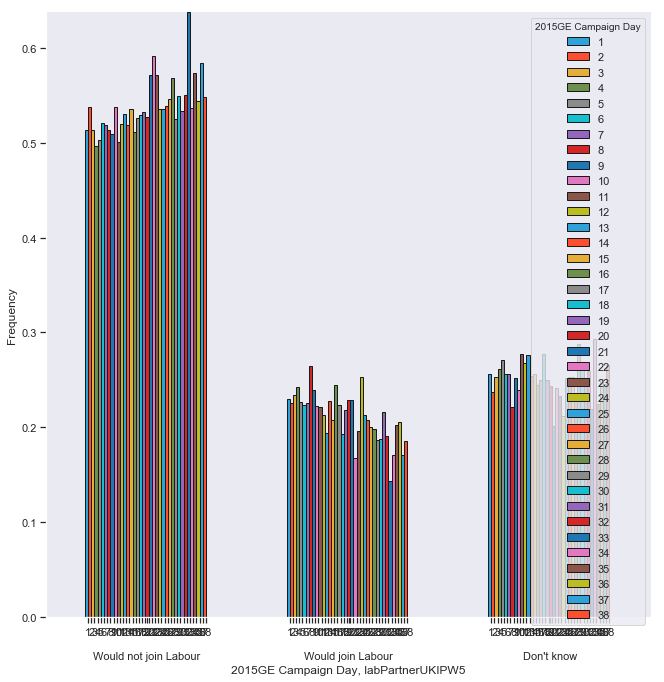

In [83]:
tables[corr_var_no].to.bars([corr_var, '2015GE Campaign Day'], 'Frequency', [])

:Bars   [CampaignDayW5,CampaignDayW5]   (frequency)
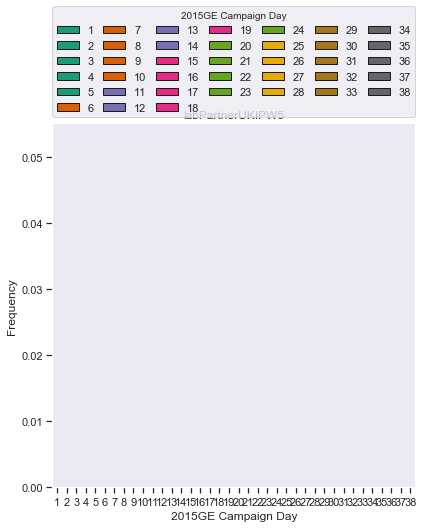

In [125]:
%%opts  Bars [category_index=2 stack_index=0 group_index=1 legend_position='top' legend_cols=7 color_by=['stack']  ]  (color=Palette('Dark2'))
bars[20]

:Layout
   .Overlay.I  :Overlay
      .Area.I   :Area   [x]   (value)
      .Area.II  :Area   [x]   (value)
      .Area.III :Area   [x]   (value)
      .Area.IV  :Area   [x]   (value)
      .Area.V   :Area   [x]   (value)
   .Overlay.II :Overlay
      .Area.I   :Area   [x]   (value,Baseline)
      .Area.II  :Area   [x]   (value,Baseline)
      .Area.III :Area   [x]   (value,Baseline)
      .Area.IV  :Area   [x]   (value,Baseline)
      .Area.V   :Area   [x]   (value,Baseline)
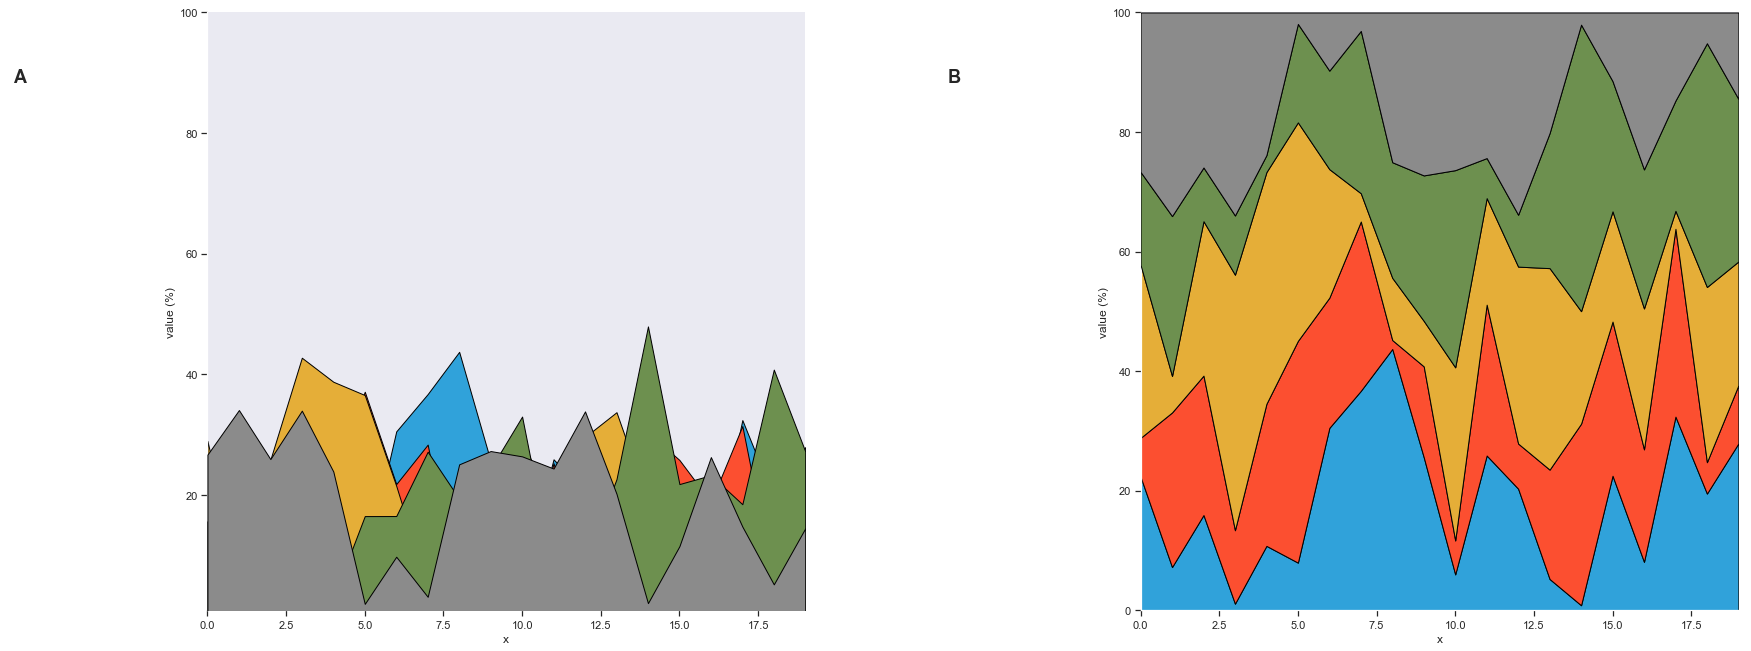

In [27]:
# http://holoviews.org/Tutorials/Elements.html
    
    
values = np.random.rand(5, 20)
percentages = (values/values.sum(axis=0)).T*100

overlay = hv.Overlay([hv.Area(percentages[:, i], vdims=[hv.Dimension('value', unit='%')]) for i in range(5)])
overlay + hv.Area.stack(overlay)

In [ ]:
tables[2]["Variable"]

In [ ]:
BES_Panel[ corr_vars[2] ].cat.ordered

In [ ]:
a["Variable"].cat.ordered

In [137]:
search(BES_Panel,"CampaignDay")

CampaignDayW5     30832
CampaignDayW8     33502
CampaignDayW12    34394
dtype: int64

In [150]:
## What do we want in a measure of "campaign volatility"?

# Guess we're trying to get at *day-to-day* volatility in excess of *within-day* volatility
# E.g. Is the STDEV of the whole sample bigger than MEAN STDEV of each day?

# Could also frame this as a statistical test about whether the daily samples are part of the same distribution?

# -> looks like the variance ration test

# https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638
# We're really talk about whether the time series is "stationary"
# But note that the exogenous impacts we're thinking of are a mixture of linear trends *and structural break points*

# relevant python package:
# https://arch.readthedocs.io/en/latest/unitroot/unitroot_examples.html#Variance-Ratio-Testing

In [159]:
sample_size = BES_reduced_with_na.notnull().apply(lambda x: x& BES_Panel[ 'CampaignDayW12' ].notnull()).sum()
# corr = BES_reduced_with_na.corrwith(BES_Panel[ 'CampaignDayW12' ])

In [144]:
%%time
means = BES_reduced_with_na.groupby(BES_Panel[ 'CampaignDayW12' ]).mean()
means.std()/means.mean()

Wall time: 10.3 s


In [164]:
mean_daily_std.loc["miilabelW1_aging population"]

0.0015290448

In [167]:
%%time
mean_daily_std = BES_reduced_with_na.groupby(BES_Panel[ 'CampaignDayW12' ]).std().mean()
whole_period_std = BES_reduced_with_na[BES_Panel[ 'CampaignDayW12' ].notnull()].std()
relative_stds = mean_daily_std/whole_period_std
display( relative_stds.dropna().sort_values() )

miilabelW1_aging population                                                  0.160816
miilabelW4_flooding                                                          0.162856
mii_catW6_domestic emergency                                                 0.165651
miilabelW1_civil liberties                                                   0.168508
miilabelW3_pol values-left                                                   0.169255
miilabelW3_class difference                                                  0.169260
miilabelW4_pol values-left                                                   0.169296
miilabelW2_energy                                                            0.169601
miilabelW4_class difference                                                  0.171405
miilabelW4_youth                                                             0.171409
mii_catW11_domestic emergency                                                0.171935
mii_catW13_Referendum unspecified                     

Wall time: 14.1 s


In [171]:
std_df = pd.DataFrame(relative_stds, columns= ["rel_std"])
std_df["sample_size"] = sample_size
std_df["mean_daily_std"] = mean_daily_std
std_df["whole_period_std"] = whole_period_std
std_df.sort_values(by="rel_std").dropna()#.head(100)

# std_df.loc["postalTurnoutW12_Yes"]

,rel_std,sample_size,mean_daily_std,whole_period_std
miilabelW1_aging population,0.160816,11061,0.001529,0.009508
miilabelW4_flooding,0.162856,13551,0.001399,0.008590
mii_catW6_domestic emergency,0.165651,15701,0.001322,0.007980
miilabelW1_civil liberties,0.168508,11061,0.001602,0.009508
miilabelW3_pol values-left,0.169255,10829,0.001626,0.009610
miilabelW3_class difference,0.169260,10829,0.001626,0.009609
miilabelW4_pol values-left,0.169296,13551,0.001454,0.008590
miilabelW2_energy,0.169601,11405,0.001588,0.009364
miilabelW4_class difference,0.171405,13551,0.001472,0.008590
miilabelW4_youth,0.171409,13551,0.001472,0.008590


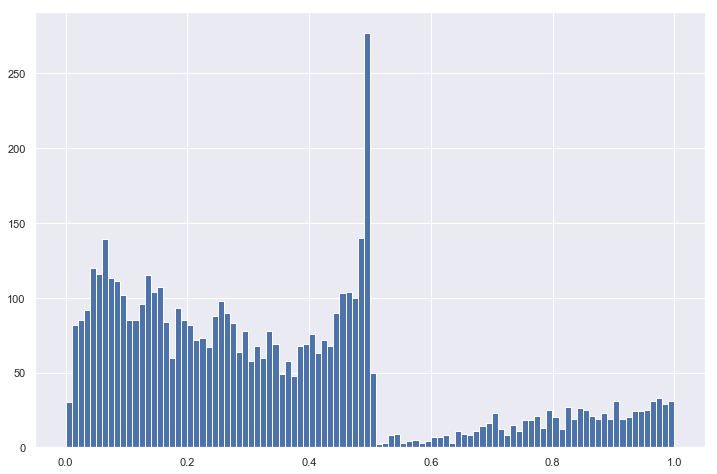

In [176]:
std_df[std_df["whole_period_std"]<1]["whole_period_std"].hist(bins=100, figsize=(12,8));

In [179]:
std_df[std_df["whole_period_std"]>.4].sort_values(by="rel_std").dropna()

,rel_std,sample_size,mean_daily_std,whole_period_std
postalTurnoutW12_Yes,0.821732,11420,0.398783,0.485296
scotReferendumTurnoutW2__Very likely that I will vote,0.904527,2822,0.493042,0.545082
minIncomeGetByW4,0.904729,2093,3992.278076,4412.676270
newspaperW12_None,0.919881,34394,0.451888,0.491246
minIncomeWellOffW4,0.927782,2105,8075.391602,8703.973633
scotReferendumTurnoutW1__Very likely that I will vote,0.948050,2488,0.504862,0.532527
noChanceCoalitionLabW12_Yes,0.962959,32082,0.424732,0.441070
finlit2W2__Less than today,0.970192,2464,0.422641,0.435626
majorityPartyLabW12__Very likely,0.975158,30368,2.549014,2.613949
scotTurnoutW7__Very likely that I will vote,0.976676,2716,0.764924,0.783191


In [180]:
import numpy as np
import pandas as pd
import arch.data.frenchdata
ff = arch.data.frenchdata.load()
excess_market = ff.iloc[:, 0]  # Excess Market
print(ff.describe())

ValueError: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 192 from PyObject

In [ ]:
### LAZY ATTEMPT TO LOOK AT LINEAR SHIFTS (CAMPAIGN DAY X VAR CORRELATIONS)

In [138]:
%%time
# 2017GE CAMPAIGN

# Correlations with CampaignDay (catches big linear effects across whole timeseries)

# Obvious: chance to have postal-voted already/have read a leaflet/have discussed pol a lot in last 7 days
#          talked about politics with people/have received fb contact from candidate&party/have been contacted by parties
# NonObvious: Conviction Labour/Conservatives would form majority falls with campaign duration (faster for Lab)
#             Conviction Labour wd form coalition with SNP rises/with UKIP falls
#             Conviction SNP wd win constituency rises


sample_size = BES_reduced_with_na.notnull().apply(lambda x: x& BES_Panel[ 'CampaignDayW12' ].notnull()).sum()
corr = BES_reduced_with_na.corrwith(BES_Panel[ 'CampaignDayW12' ])

corr_df = pd.DataFrame(corr, columns= ["corr"])
corr_df["sample_size"] = sample_size
corr_df["absolute corr"] = corr.abs()


Wall time: 56.7 s


In [139]:
display( corr_df[corr_df["sample_size"]>2000].sort_values(by="absolute corr", ascending=False).head(50) )

,corr,sample_size,absolute corr
postalTurnoutW12_Yes,0.484243,11420,0.484243
small_mii_catW12_Terrorism,0.283257,29286,0.283257
mii_catW12_terrorism,0.274498,31081,0.274498
noChanceCoalitionLabW12_Yes,-0.240808,32082,0.240808
majorityPartyLabW12__Very likely,0.217966,30368,0.217966
labUnitedW12__Very united,0.180555,30134,0.180555
majorityPartyConW12__Very likely,-0.180542,30438,0.180542
small_mii_catW12_Europe,-0.170517,29286,0.170517
partyContact1W12_Yes,0.164664,33162,0.164664
mii_catW12_europe,-0.161981,31081,0.161981


In [130]:
%%time
# 2016EUREF CAMPAIGN

# Correlations with CampaignDay (catches big linear effects across whole timeseries)

# Obvious: chance to have postal-voted already/have read a leaflet/have discussed pol a lot in last 7 days
#          talked about politics with people/have received fb contact from candidate&party/have been contacted by parties
# NonObvious: Conviction Labour/Conservatives would form majority falls with campaign duration (faster for Lab)
#             Conviction Labour wd form coalition with SNP rises/with UKIP falls
#             Conviction SNP wd win constituency rises


sample_size = BES_reduced_with_na.notnull().apply(lambda x: x& BES_Panel[ 'CampaignDayW8' ].notnull()).sum()
corr = BES_reduced_with_na.corrwith(BES_Panel[ 'CampaignDayW8' ])

corr_df = pd.DataFrame(corr, columns= ["corr"])
corr_df["sample_size"] = sample_size
corr_df["absolute corr"] = corr.abs()
corr_df[corr_df["sample_size"]>2000].sort_values(by="absolute corr", ascending=False).head(30)

Wall time: 55.6 s


In [136]:

corr_df = pd.DataFrame(corr, columns= ["corr"])
corr_df["sample_size"] = sample_size
corr_df["absolute corr"] = corr.abs()
corr_df[corr_df["sample_size"]>2000].sort_values(by="absolute corr", ascending=False).head(50)

,corr,sample_size,absolute corr
postalTurnoutW8_Yes,0.541465,10619,0.541465
partyContactVoteLeaveW8_Yes,0.230744,5294,0.230744
discussPolDaysW8__7 days,0.167848,31632,0.167848
euSources_5W8_Yes,0.162390,26967,0.162390
participation_4W8_Yes,0.156192,6070,0.156192
euSources_1W8_Yes,0.152425,27931,0.152425
partyContactConW8_Yes,-0.144512,5294,0.144512
euSources_4W8_Yes,0.143808,23823,0.143808
partyContactStrongerInW8_Yes,0.139737,5294,0.139737
euSources_111W8_Yes,-0.139462,30914,0.139462


In [134]:
BES_Panel["LRAL_mii_catW8"].value_counts()

Lib-auth              21020
Left-right             7250
Other                  1203
General-negativity      798
Name: LRAL_mii_catW8, dtype: int64

In [140]:
search(BES_reduced_with_na,"likeBennett")

likeBennettW4__Strongly like    19921
likeBennettW5__Strongly like    24802
likeBennettW6__Strongly like    24983
likeBennettW7__Strongly like    21164
likeBennettW8__Strongly like    23936
likeBennettW9__Strongly like    21022
dtype: int64

In [141]:
BES_reduced_with_na["likeBennettW5__Strongly like"].corr(BES_Panel[ 'CampaignDayW5' ])

# it's about the Don't knows!

0.003240138532536074

In [128]:
%%time
# 2015GE CAMPAIGN

# Correlations with CampaignDay (catches big linear effects across whole timeseries)

# Obvious: chance to have postal-voted already/have read a leaflet/have discussed pol a lot in last 7 days
#          talked about politics with people/have received fb contact from candidate&party/have been contacted by parties
# NonObvious: Conviction Labour/Conservatives would form majority falls with campaign duration (faster for Lab)
#             Conviction Labour wd form coalition with SNP rises/with UKIP falls
#             Conviction SNP wd win constituency rises


sample_size = BES_reduced_with_na.notnull().apply(lambda x: x& BES_Panel[ 'CampaignDayW5' ].notnull()).sum()
corr = BES_reduced_with_na.corrwith(BES_Panel[ 'CampaignDayW5' ])

corr_df = pd.DataFrame(corr, columns= ["corr"])
corr_df["sample_size"] = sample_size
corr_df["absolute corr"] = corr.abs()
corr_df[corr_df["sample_size"]>2000].sort_values(by="absolute corr", ascending=False).head(30)

,corr,sample_size,absolute corr
postalTurnoutW5_Yes,0.524393,8989,0.524393
discussPolDaysW5__7 days,0.133703,29498,0.133703
labPartnerSNPW5_Would join Labour,0.107520,10890,0.107520
participation_5W5_Yes,0.106275,30263,0.106275
winConstituencySNPW5__100 - Very likely to win,0.099824,5214,0.099824
majorityPartyLabW5__Very likely,-0.093113,27579,0.093113
infoSourcePeopleW5__More than 2 hours,0.085988,30131,0.085988
fbInfo_1W5__Don't follow politics on facebook,-0.073109,19952,0.073109
labPartnerUKIPW5_Would join Labour,-0.072688,23509,0.072688
profile_newspaperW13_The Sun,-0.070719,15736,0.070719


In [113]:
W5cats = [x for x in BES_Panel.columns if ("W5" in x) & (BES_Panel[x].dtype.name =='category')]
W5_cats_df = BES_Panel[W5cats].apply(lambda x : x.cat.codes).replace(-1,np.nan)

sample_size = W5_cats_df.notnull().apply(lambda x: x& BES_Panel[ 'CampaignDayW5' ].notnull()).sum()
corr = W5_cats_df.corrwith(BES_Panel[ 'CampaignDayW5' ])


corr_df = pd.DataFrame(corr, columns= ["corr"])
corr_df["sample_size"] = sample_size
corr_df["absolute corr"] = corr.abs()
corr_df[corr_df["sample_size"]>2000].sort_values(by="absolute corr", ascending=False).head(21)

,corr,sample_size,absolute corr
postalTurnoutW5,0.516285,9004,0.516285
discussPolDaysW5,0.112139,30832,0.112139
winConstituencySNPW5,0.093173,5517,0.093173
participation_5W5,0.090274,30832,0.090274
likeBennettW5,-0.072470,30825,0.072470
infoSourcePeopleW5,0.071878,30831,0.071878
fbInfo_1W5,-0.070705,20513,0.070705
majorityPartyLabW5,-0.069642,30827,0.069642
labPartnerSNPW5,0.069545,12678,0.069545
fbInfo_3W5,-0.062136,20513,0.062136


In [31]:
corr_df[corr_df["sample_size"]>2000].sort_values(by="absolute corr", ascending=False).head(21).index

Index(['postalTurnoutW5', 'discussPolDaysW5', 'winConstituencySNPW5',
       'participation_5W5', 'likeBennettW5', 'infoSourcePeopleW5',
       'fbInfo_1W5', 'majorityPartyLabW5', 'labPartnerSNPW5', 'fbInfo_3W5',
       'lrgreensW5', 'fbInfo_2W5', 'partyContactConW5', 'lrPCW5', 'lrSNPW5',
       'majorityPartyConW5', 'conPartnerSNPW5', 'noChanceCoalitionSNPW5',
       'noChanceCoalitionLDW5', 'conToneW5', 'labPartnerUKIPW5'],
      dtype='object')

In [32]:
corr_vars

NameError: name 'corr_vars' is not defined